## Different methods to get to $\pi$ and check the speed at which we converge to $\pi$

The approach in [Chudnovsky.ipynb](Chudnovsky.ipynb) is really good as it converges to the value of $\pi$ even in one term and then offer higher order corrections for increasing n.

In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline

# Define the width of the figure
FigureWidth = 3.375
# Scaling factor for adjusting sizes
factor = 2

# Set global parameters for matplotlib
params = {
    'lines.linewidth': 3,
    'axes.labelsize': int(9 * factor),
    'legend.fontsize': int(6.5 * factor),
    'xtick.labelsize': int(9 * factor),
    'ytick.labelsize': int(9 * factor),
    'text.usetex': True,
    'font.family': 'serif'
}
plt.rcParams.update(params)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

def prepare_plot(params):
    """
    Prepares a matplotlib figure with two subplots.

    Parameters:
    params (dict): A dictionary containing plot parameters including:
        - 'Xmin': Minimum x-axis value
        - 'Xmax': Maximum x-axis value
        - 'Ymin': Minimum y-axis value
        - 'Ymax': Maximum y-axis value

    Returns:
    tuple: A tuple containing the figure and the two axes objects (fig, ax1, ax2).
    """
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((factor + 0.5) * FigureWidth, FigureWidth))

    # Configure the first subplot
    ax1.set_xlim(params["Xmin"], params["Xmax"])
    ax1.set_ylim(params["Ymin"], params["Ymax"])
    ax1.set_xlabel(r'\# number of terms')
    ax1.set_ylabel(r'Value')
    ax1.set_box_aspect(1)  # Aspect ratio is 1:1

    # Configure the second subplot with logarithmic scales
    ax2.set_xlim(params["Xmin"], params["Xmax"])
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel(r'\# number of terms')
    ax2.set_ylabel(r'$\|\left(Y - \pi\right)\|/\pi$')
    ax2.set_box_aspect(1)  # Aspect ratio is 1:1

    return fig, ax1, ax2

### Basel approach

It is a specific series expansion which was solved by Euler.

$$ \sum_{n=1}^{\infty} \frac{1}{n^2} = \frac{1}{1^2} + \frac{1}{2^2} + \frac{1}{3^2} + \cdots $$

It can be used to estimate $\pi$

$$ \pi = \sqrt{6\sum_{n=1}^{\infty} \frac{1}{n^2}} $$


In [4]:
import numpy as np
import math

def calculate_basel_sum(n):
    """
    Calculate the sum of the series: sum(1 / i^2) for i from 1 to n,
    and then return the square root of 6 times this sum.

    This series is related to the Basel problem, where the sum converges to (pi^2 / 6) as n approaches infinity.

    Parameters:
    n (int): The number of terms in the series. Must be a positive integer.

    Returns:
    float: The square root of 6 times the sum of the series. If n is less than or equal to 0, returns 0.
    """
    if n <= 0:
        return 0
    
    series_sum = 0
    for i in range(1, n + 1):
        series_sum += 1 / (i ** 2)
    
    return np.sqrt(6 * series_sum)

# Example usage
num_terms = 100
result = calculate_series_sum(num_terms)
print(f"Sum of the series for {num_terms} terms: {result}")


Sum of the series for 100 terms: 3.1320765318091053


Final value (for 1000 terms): 3.1406380562059946
Difference from π: 0.00095459738379855


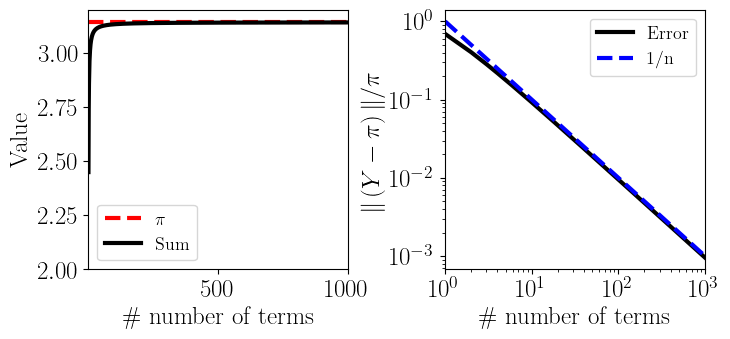

In [5]:
# Generate data for plotting
max_terms = 1000
x_values = range(1, max_terms + 1)
y_values = [calculate_basel_sum(n) for n in x_values]

# Plot parameters
plt_params = {
    "Xmin": 1, "Xmax": max_terms,
    "Ymin": 2e0, "Ymax": 3.2
}

# Prepare the plot
fig, ax1, ax2 = prepare_plot(plt_params)

# Plot the actual value of π as a red dashed line
ax1.plot((1, max_terms + 1), (math.pi, math.pi), 'r--', label=r'$\pi$')

# Plot the calculated series sum
ax1.plot(x_values, y_values, 'k-', label=r'Sum')
ax1.legend()

# Calculate the error from π
Err = np.abs(np.array(y_values) - math.pi)

# Plot the error on a logarithmic scale
ax2.plot(x_values, Err, 'k-', label=r'Error')

# Plot the 1/n line for comparison
y = np.array(x_values, dtype=float)**(-1)
ax2.plot(x_values, y, 'b--', label=r'1/n')
ax2.legend()

# Print the final value
final_value = y_values[-1]
print(f"Final value (for {max_terms} terms): {final_value}")
print(f"Difference from π: {abs(final_value - np.pi)}")

###  Leibniz series

The Leibniz series is a simple and elegant infinite series for calculating the value of π. It is derived from the Taylor series expansion of the arctangent function. The series is expressed as:

$$ \frac{\pi}{4} = 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} - \frac{1}{11} + \cdots $$

In general form, it can be written as:

$$ \frac{\pi}{4} = \sum_{n=0}^{\infty} \frac{(-1)^n}{2n+1} $$


In [6]:
def calculate_leibniz_sum(n):
    if n <= 0:
        return 0
    series_sum = sum((-1)**(i+1) / (2*i - 1) for i in range(1, n + 1))
    return 4 * series_sum

# Example usage
num_terms = 100
result = calculate_leibniz_sum(num_terms)
print(f"Sum of the series for {num_terms} terms: {result}")


Sum of the series for 100 terms: 3.1315929035585537


Final value (Basel, for 100 terms): 3.1320765318091053
Difference from π: 0.009516121780687836
Final value (Leibniz, for 100 terms): 3.1315929035585537
Difference from π: 0.00999975003123943


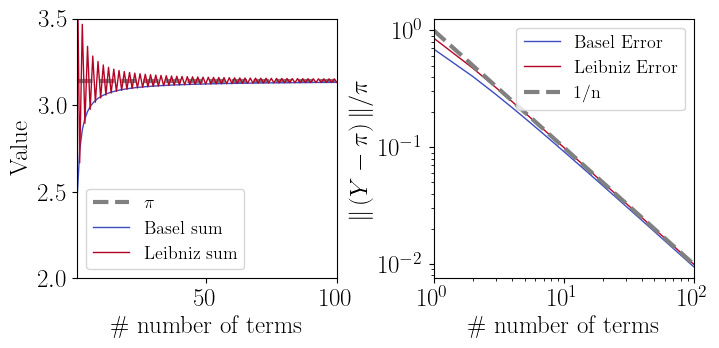

In [22]:
# Generate data for plotting
max_terms = 100
x_values = range(1, max_terms + 1)
y_values_basel = [calculate_basel_sum(n) for n in x_values]
y_values_leibniz = [calculate_leibniz_sum(n) for n in x_values]

# Plot parameters
plt_params = {
    "Xmin": 1, "Xmax": max_terms,
    "Ymin": 2e0, "Ymax": 3.5
}

cmap = plt.cm.coolwarm(np.linspace(0, 1, 2))

# Prepare the plot
fig, ax1, ax2 = prepare_plot(plt_params)

# Plot the actual value of π as a red dashed line
ax1.plot((1, max_terms + 1), (math.pi, math.pi), '--', color='gray', label=r'$\pi$')

# Plot the calculated series sum
ax1.plot(x_values, y_values_basel, '-', color=cmap[0], linewidth=1, label=r'Basel sum')
ax1.plot(x_values, y_values_leibniz, '-', color=cmap[-1], linewidth=1, label=r'Leibniz sum')
ax1.legend()

# Calculate the error from π
Err_basel = np.abs(np.array(y_values_basel) - math.pi)
Err_leibniz = np.abs(np.array(y_values_leibniz) - math.pi)

# Plot the error on a logarithmic scale
ax2.plot(x_values, Err_basel, '-', color=cmap[0], linewidth=1, label=r'Basel Error')
ax2.plot(x_values, Err_leibniz, '-', color=cmap[-1], linewidth=1, label=r'Leibniz Error')

# Plot the 1/n line for comparison
x = np.logspace(0,2,100)
y = np.array(x, dtype=float)**(-1)
ax2.plot(x, y, '--', color='gray', label=r'1/n')
ax2.legend()

# Print the final value for Basel series
final_value_basel = y_values_basel[-1]
print(f"Final value (Basel, for {max_terms} terms): {final_value_basel}")
print(f"Difference from π: {abs(final_value_basel - math.pi)}")

# Print the final value for Leibniz series
final_value_leibniz = y_values_leibniz[-1]
print(f"Final value (Leibniz, for {max_terms} terms): {final_value_leibniz}")
print(f"Difference from π: {abs(final_value_leibniz - math.pi)}")